# Preprocessing the data
Data preprocessing transforms the data into a format that will be more easily and effectively processed with the data mining techniques and tools

### Importing necessary libraries

In [79]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import normalize
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler

### Loading the data set
Showing the value of the flow with hourly mean

In [58]:
flow = pd.read_csv('../dataset/flow1.csv', parse_dates={'hour':['time']},index_col='hour')
dayfirst=True
flow = flow.resample('60T').mean()

In [59]:
flow = flow.reset_index()

In [60]:
flow['time'] = flow['hour']
flow.head()

,hour,flow,time
0,2015-06-01 14:00:00,113.754443,2015-06-01 14:00:00
1,2015-06-01 15:00:00,113.013333,2015-06-01 15:00:00
2,2015-06-01 16:00:00,114.081666,2015-06-01 16:00:00
3,2015-06-01 17:00:00,116.459167,2015-06-01 17:00:00
4,2015-06-01 18:00:00,123.825000,2015-06-01 18:00:00


In [61]:
flow['hour'] = (flow['hour'].dt.hour)

In [62]:
flow.head()

,hour,flow,time
0,14,113.754443,2015-06-01 14:00:00
1,15,113.013333,2015-06-01 15:00:00
2,16,114.081666,2015-06-01 16:00:00
3,17,116.459167,2015-06-01 17:00:00
4,18,123.825000,2015-06-01 18:00:00


### Filling the missing values with the mean of the data

In [63]:
flow = flow.fillna(flow.mean())

## Using different techniques for data preparation

### Standardization (or Z-score normalization)

In [64]:
# properties of a standard normal distribution with μ=0 and σ=1

In [65]:
std = flow

In [69]:
std['zscore'] = zscore(std['flow'])

### Plotting the data after zscore normalization

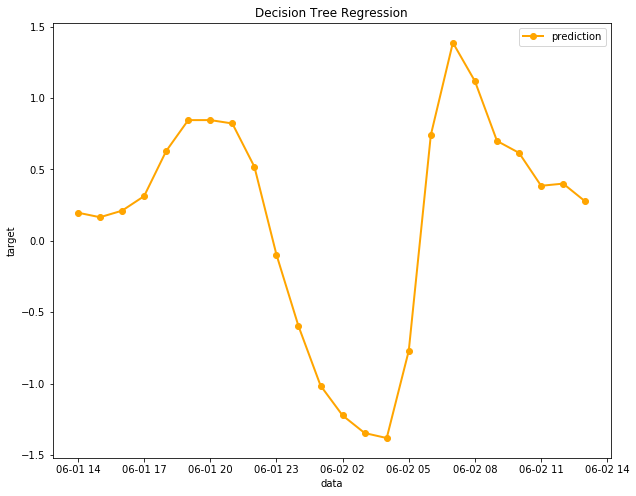

In [72]:
plt.figure(figsize=(10, 8))
plt.plot(std['time'][:24], std['zscore'][:24], color="orange", marker="o",label="prediction", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

### Standard Scaler
mean value 0 and standard deviation of 1

In [85]:
scaler = preprocessing.StandardScaler()
std['scaler'] = scaler.fit_transform(std[['flow']])

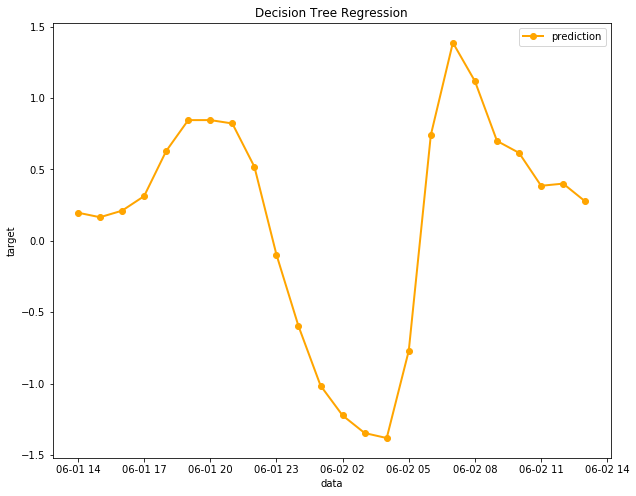

In [86]:
plt.figure(figsize=(10, 8))
plt.plot(std['time'][:24], std['scaler'][:24], color="orange", marker="o",label="prediction", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()